In [1]:
import sys
# config the path of your project
sys.path.append(r"F:\Lecture\Project\Project for Network IDS")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
plt.rc('font',family='Times New Roman')

# Path Config

In [4]:
SUPER_PATH = r"..\supervised_learning\{}\csvs\model_evaluation.csv"
UNSUPER_PATH = r"..\unsupervised_learning\{}\csvs\model_evaluation.csv"

# Datasets Explore

# Supervised Live Data

In [5]:
file_names = ["S_ARM_Live", "S_filter_Live", "S_RFE_Live"]
f1_scores, aucs, fprs, fnrs, fars = [], [], [], [], []

for filename in file_names:
    f1_score, auc, fpr, fnr, far = [], [], [], [], []
    with open(SUPER_PATH.format(filename), 'r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='\t')  # 假设你的CSV文件使用制表符分隔数据
        next(csv_reader)
        for row in csv_reader:
            model, f1, auc_value, fpr_value, fnr_value, far_value = row[0].rsplit(',', 5)
            f1_score.append(float(f1))
            auc.append(float(auc_value))
            fpr.append(float(fpr_value))
            fnr.append(float(fnr_value))
            far.append(float(far_value))
    f1_scores.append(f1_score)
    aucs.append(auc)
    fprs.append(fpr)
    fnrs.append(fnr)
    fars.append(far)

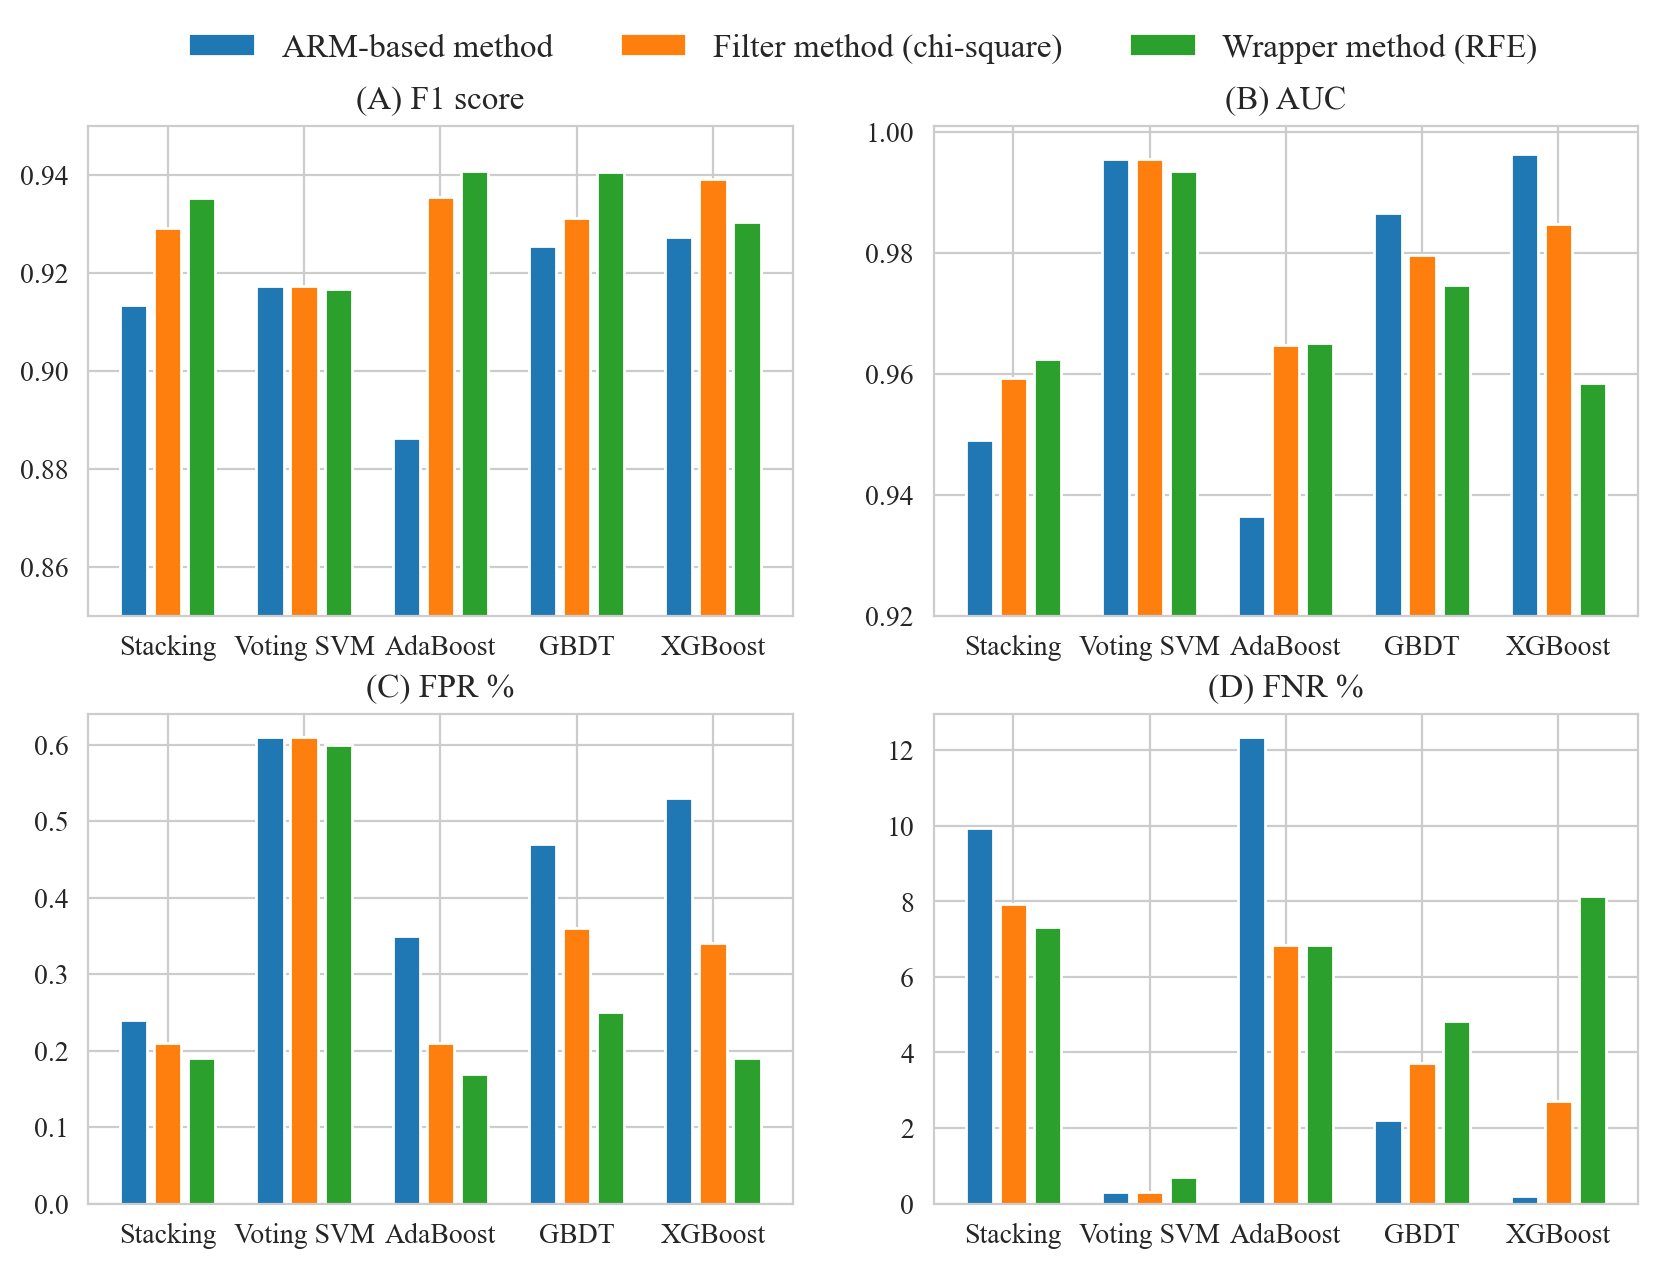

In [6]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,7), dpi=200)
ax = ax.flatten()   
title = ["(A) F1 score", "(B) AUC", "(C) FPR %", "(D) FNR %"]
c = ["#20854EE5","#FF8C00","#0072B5E5"]

y = [f1_scores, aucs, fprs, fnrs]

# 设置柱状图的宽度和间隔以及每个柱子的位置
bar_width = 0.2
bar_gap = 0.05

pos1 = np.arange(5) - (bar_width + bar_gap)
pos2 = np.arange(5)
pos3 = np.arange(5) + (bar_width + bar_gap)

# 绘制柱状图
for i in range(4):
    ax[i].bar(pos1, y[i][0], width=bar_width, label='ARM-based method')
    ax[i].bar(pos2, y[i][1], width=bar_width, label='Filter method (chi-square)')
    ax[i].bar(pos3, y[i][2], width=bar_width, label='Wrapper method (RFE)')
    # 设置轴标签和图例
    ax[i].set_xticks(np.arange(5), ["Stacking","Voting SVM", "AdaBoost", "GBDT", "XGBoost"])
    ax[i].set_title(title[i])
ax[0].set_ylim(0.85, 0.95)
ax[1].set_ylim(0.92, 1.001)
ax[1].legend(bbox_to_anchor=[0.9, 1.25], frameon=False, ncol=3, fontsize=12)

# 显示图形
plt.show()


plt.show()
# f.savefig("supervised_live_performance.pdf")

# Supervised Train Test Data

In [7]:
file_names = ["S_ARM_Train_Test", "S_filter_Train_Test", "S_RFE_Train_Test"]
f1_scores, aucs, fprs, fnrs, fars = [], [], [], [], []

for filename in file_names:
    f1_score, auc, fpr, fnr, far = [], [], [], [], []
    with open(SUPER_PATH.format(filename), 'r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='\t')  # 假设你的CSV文件使用制表符分隔数据
        next(csv_reader)
        for row in csv_reader:
            model, f1, auc_value, fpr_value, fnr_value, far_value = row[0].rsplit(',', 5)
            f1_score.append(float(f1))
            auc.append(float(auc_value))
            fpr.append(float(fpr_value))
            fnr.append(float(fnr_value))
            far.append(float(far_value))
    f1_scores.append(f1_score)
    aucs.append(auc)
    fprs.append(fpr)
    fnrs.append(fnr)
    fars.append(far)

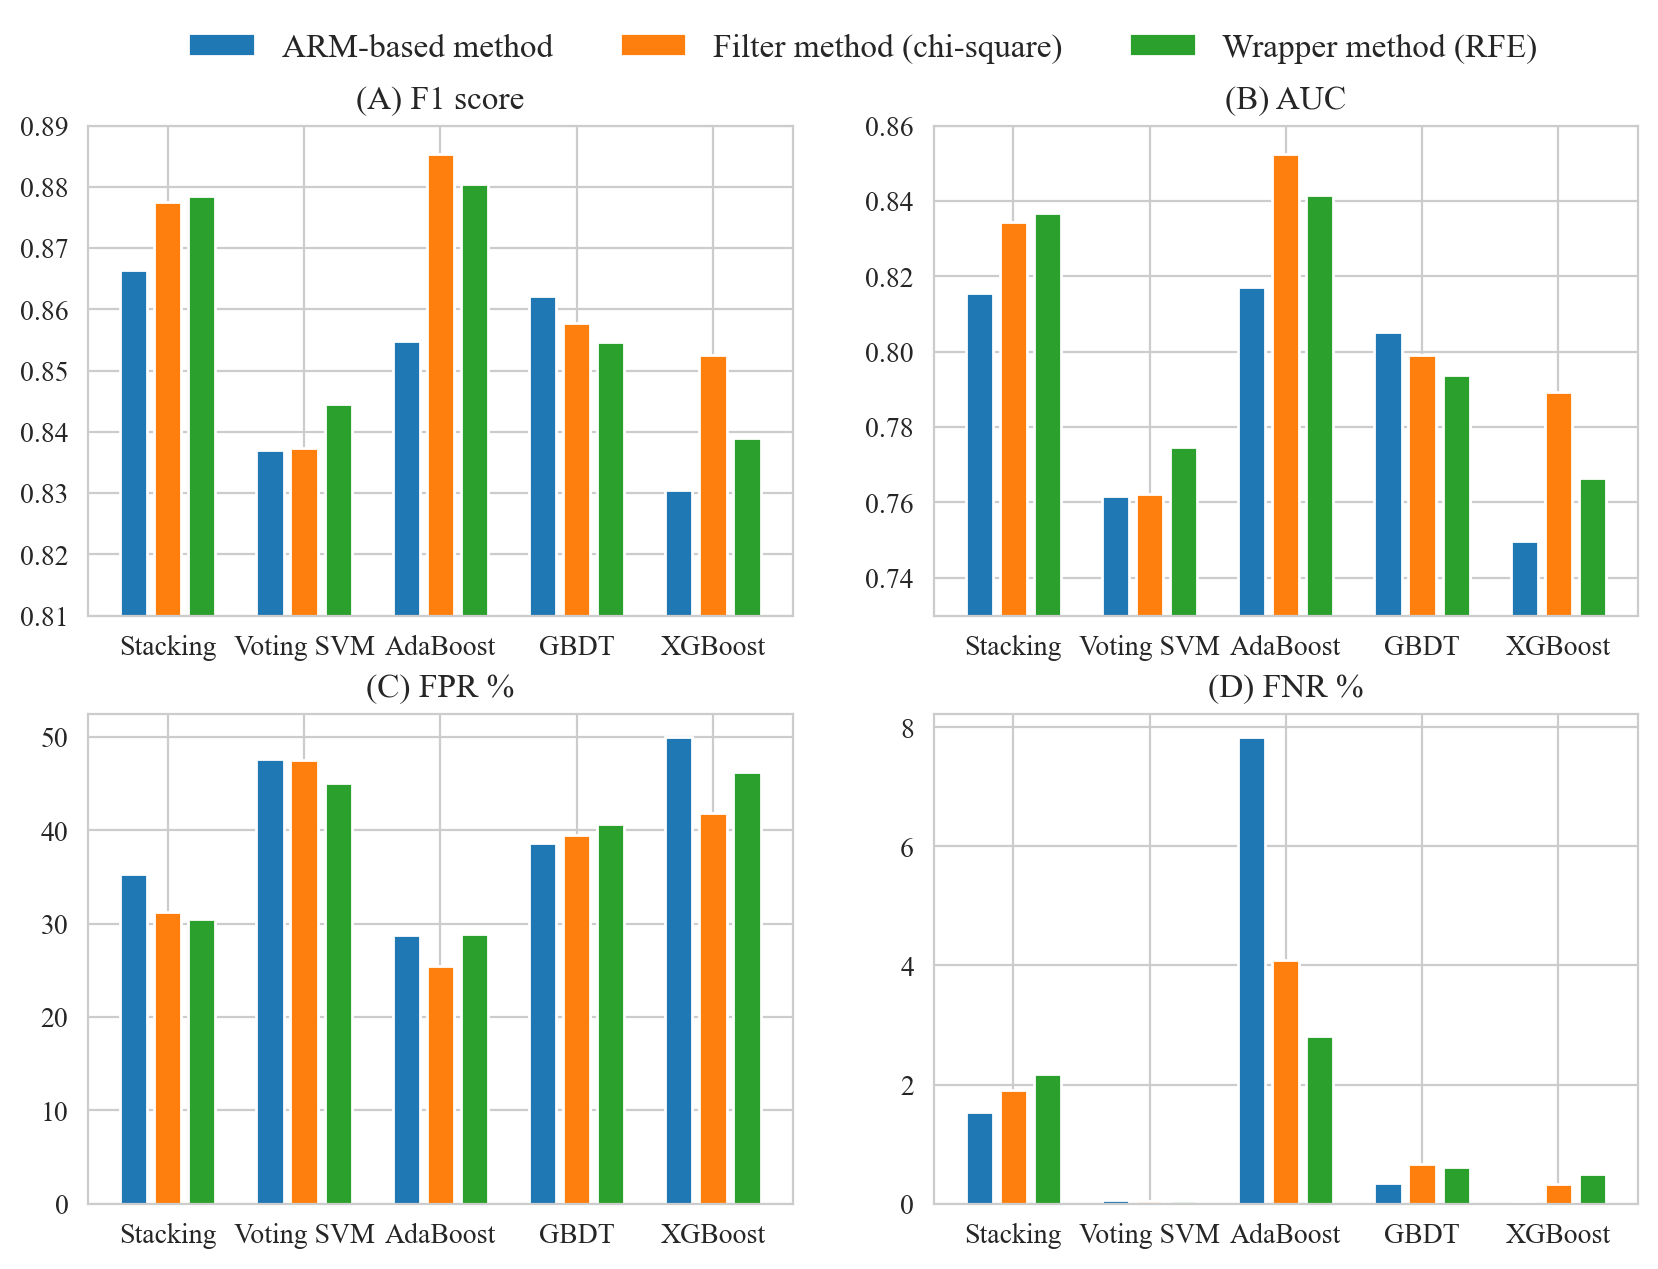

In [8]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,7), dpi=200)
ax = ax.flatten()   
title = ["(A) F1 score", "(B) AUC", "(C) FPR %", "(D) FNR %"]
c = ["#20854EE5","#FF8C00","#0072B5E5"]

y = [f1_scores, aucs, fprs, fnrs]

# 设置柱状图的宽度和间隔以及每个柱子的位置
bar_width = 0.2
bar_gap = 0.05

pos1 = np.arange(5) - (bar_width + bar_gap)
pos2 = np.arange(5)
pos3 = np.arange(5) + (bar_width + bar_gap)

# 绘制柱状图
for i in range(4):
    ax[i].bar(pos1, y[i][0], width=bar_width, label='ARM-based method')
    ax[i].bar(pos2, y[i][1], width=bar_width, label='Filter method (chi-square)')
    ax[i].bar(pos3, y[i][2], width=bar_width, label='Wrapper method (RFE)')
    # 设置轴标签和图例
    ax[i].set_xticks(np.arange(5), ["Stacking","Voting SVM", "AdaBoost", "GBDT", "XGBoost"])
    ax[i].set_title(title[i])
ax[0].set_ylim(0.81, 0.89)
ax[1].set_ylim(0.73, 0.86)
ax[1].legend(bbox_to_anchor=[0.9, 1.25], frameon=False, ncol=3, fontsize=12)

# 显示图形
plt.show()


plt.show()
# f.savefig("supervised_train_test_performance.pdf")

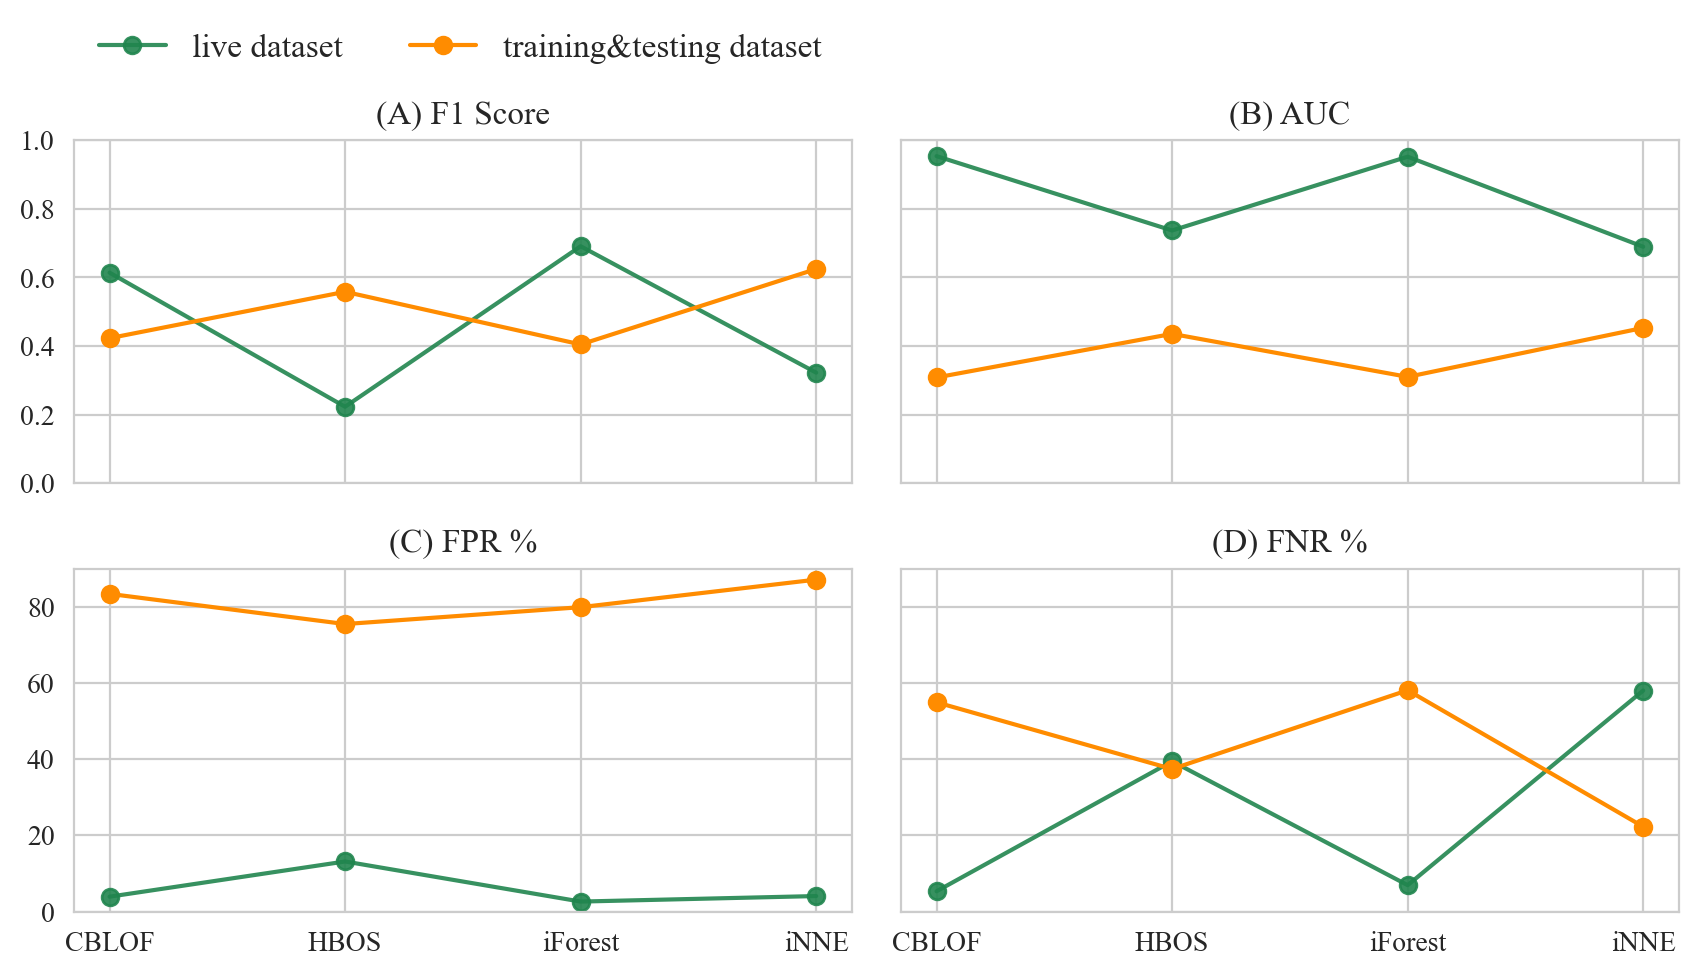

In [29]:
file_names = ["UNS_ARM_Live", "UNS_ARM_Train_Test"]
c = ["#20854EE5","#FF8C00"]
labels = ["live dataset", "training&testing dataset"]

fig, axs = plt.subplots(2, 2, figsize=(9, 5), dpi=200)
axs = axs.flatten()  # 展平子图对象

for i in range(2):
    data = pd.read_csv(UNSUPER_PATH.format(file_names[i]))
    # 提取数据
    models = ["CBLOF", "HBOS", "iForest", "iNNE"]
    f1_scores = data['F1 Score']
    auc_scores = data['AUC']
    fpr_percentages = data['FPR %']
    fnr_percentages = data['FNR %']

    axs[0].plot(models, f1_scores, marker='o', color=c[i], label=labels[i])
    axs[1].plot(models, auc_scores, marker='o', color=c[i], label=labels[i])
    axs[2].plot(models, fpr_percentages, marker='o', color=c[i])
    axs[3].plot(models, fnr_percentages, marker='o', color=c[i])


axs[0].set_title('(A) F1 Score')
axs[0].set_xticklabels([])
axs[0].set_ylim(0, 1)

axs[1].set_title('(B) AUC')
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])
axs[1].set_ylim(0, 1)

axs[2].set_title('(C) FPR %')
axs[2].set_ylim(0, 90)

axs[3].set_title('(D) FNR %')
axs[3].set_ylim(0, 90)
axs[3].set_yticklabels([])

axs[0].legend(bbox_to_anchor=[1, 1.4], frameon=False, ncol=2, fontsize=12)
plt.tight_layout()

# 显示图表
plt.show()
fig.savefig("unsupervised_performance.pdf")